# Dijkstra’s Algorithm

**Definition** : Dijkstra algorithm finds the shortest path from a starting node to all other nodes in a weighted graph.

In [2]:
graph = {
    'A': [('B', 1), ('C', 4)],
    'B': [('C', 2), ('D', 5)],
    'C': [('D', 1)],
    'D': []
}

In the above code, a weighted graph is defined whose representation is shown below.

Note that this way to define the weighted graph allows unidirectional moves (A → B but no B → A).

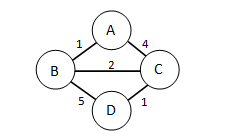

#### **Implementation**

Here, we start from a source node. We then place this node, along with its initial distance of zero, into a priority queue (which acts like a min-heap).

Now, as long as there are nodes in our priority queue, the algorithm continues. Each time, we extract the node with the smallest known distance from the queue. If we've already found a shorter path to this node, we simply skip it. Otherwise, for each of its neighbors, we calculate a potential new, shorter distance by adding the current node's distance to the edge weight connecting it to the neighbor.

If this new distance is indeed shorter than what we previously knew for that neighbor, we update the neighbor's shortest distance and add the neighbor (with its new, shorter distance) back into the priority queue.

The crucial difference from a simple Breadth-First Search (BFS) or Depth-First Search (DFS) is the priority queue: instead of visiting nodes in a strict order (like FIFO for BFS or LIFO for DFS), Dijkstra always prioritizes visiting the unvisited node closest to the starting point. This ensures that when we process a node, we've found the shortest path to it.

In [ ]:
import heapq

def dijkstra(graph, start):
    distances = {node: float('inf') for node in graph}
    distances[start] = 0
    
    priority_queue = [(0, start)]  # (distance, node)
    
    while priority_queue:
        current_distance, current_node = heapq.heappop(priority_queue)

        if current_distance > distances[current_node]:
            continue

        for neighbor, weight in graph[current_node]:
            distance = current_distance + weight
            if distance < distances[neighbor]:
                distances[neighbor] = distance
                heapq.heappush(priority_queue, (distance, neighbor))
                
    return distances

#### **Testing**

We can check that the output of our example will be 1 for A → B, 3 for A → C and 4 for A → D.

In [5]:
start_node = 'A'
shortest_paths = dijkstra(graph, start_node)

# Output distances
for node in shortest_paths:
    print(f"Shortest distance from {start_node} to {node}: {shortest_paths[node]}")

Shortest distance from A to A: 0
Shortest distance from A to B: 1
Shortest distance from A to C: 3
Shortest distance from A to D: 4
